### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
# I use these three lines of code on top of my each Notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [2]:
# Downloading all necessary Libraries and Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile
import tensorflow as tf

from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Getting the Data**
* I am using Google Colab for this Project, so the act of reading the Data might be different from different platforms.

In [3]:
# Loading the Data
# Using the Google Colab for the act of loading the Data

# Loading the Training Data
# Uncomment the cell below
#!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

# Loading the Validation Data
# Uncomment the cell below
#!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-11 02:03:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  79.8MB/s    in 1.8s    

2020-08-11 02:03:19 (79.8 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-08-11 02:03:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 173.194.79.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

**Processing the Data**
* The following Python code will use OS library to access the file system and zip file library, allowing you to unzip the file.

In [4]:
# Training Data
local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/horse-or-human")
zip_ref.close()

In [5]:
# Validation Data
local_zip = "/tmp/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/validation-horse-or-human")
zip_ref.close()

* The contents of the .zip file are extracted to the base directory, which in turn contains humans and horses as sub-directories.

* Let's define each of these directories as follows:

In [6]:
# Directory with our training horse pictures 
train_horse_dir = os.path.join("/tmp/horse-or-human/horses") 

# Directory with our training human pictures
train_human_dir = os.path.join("/tmp/horse-or-human/humans")

# Directory with our validation horse pictures
validation_horse_dir = os.path.join("/tmp/validation-horse-or-human/horses")

# Directory with our validation human pictures
validation_human_dir = os.path.join("/tmp/validation-horse-or-human/humans")

* Now, Let's look at the filenames in horses and humans training and validation directories.

In [7]:
# Training horse directory
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

# Training human directory
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

# Validation horse directory
validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

# Validation human directory
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse03-7.png', 'horse42-6.png', 'horse37-5.png', 'horse29-5.png', 'horse15-2.png', 'horse44-5.png', 'horse37-1.png', 'horse18-7.png', 'horse02-1.png', 'horse23-4.png']
['human02-29.png', 'human12-13.png', 'human17-12.png', 'human10-24.png', 'human02-10.png', 'human03-29.png', 'human04-26.png', 'human04-14.png', 'human10-16.png', 'human02-22.png']
['horse6-218.png', 'horse4-588.png', 'horse4-188.png', 'horse2-269.png', 'horse2-582.png', 'horse3-011.png', 'horse5-400.png', 'horse5-032.png', 'horse3-070.png', 'horse3-469.png']
['valhuman04-09.png', 'valhuman01-19.png', 'valhuman02-05.png', 'valhuman03-08.png', 'valhuman05-19.png', 'valhuman05-26.png', 'valhuman05-06.png', 'valhuman02-12.png', 'valhuman03-15.png', 'valhuman04-16.png']


* Now, Let's find the total number of Horse and Human Images in each directories.

In [8]:
# Training horses
print(f"Total training horse images: {len(os.listdir(train_horse_dir))}")

# Training humans 
print(f"Total training humans images: {len(os.listdir(train_human_dir))}")

# Validation horses 
print(f"Total validation horse images: {len(os.listdir(validation_horse_dir))}")

# Validation humans 
print(f"Total validation humans images: {len(os.listdir(validation_human_dir))}")

Total training horse images: 500
Total training humans images: 527
Total validation horse images: 128
Total validation humans images: 128


**Data Visualization**
* Now, Let's look at the few pictures of the Images to get the sense of how does the Data actually looks like.

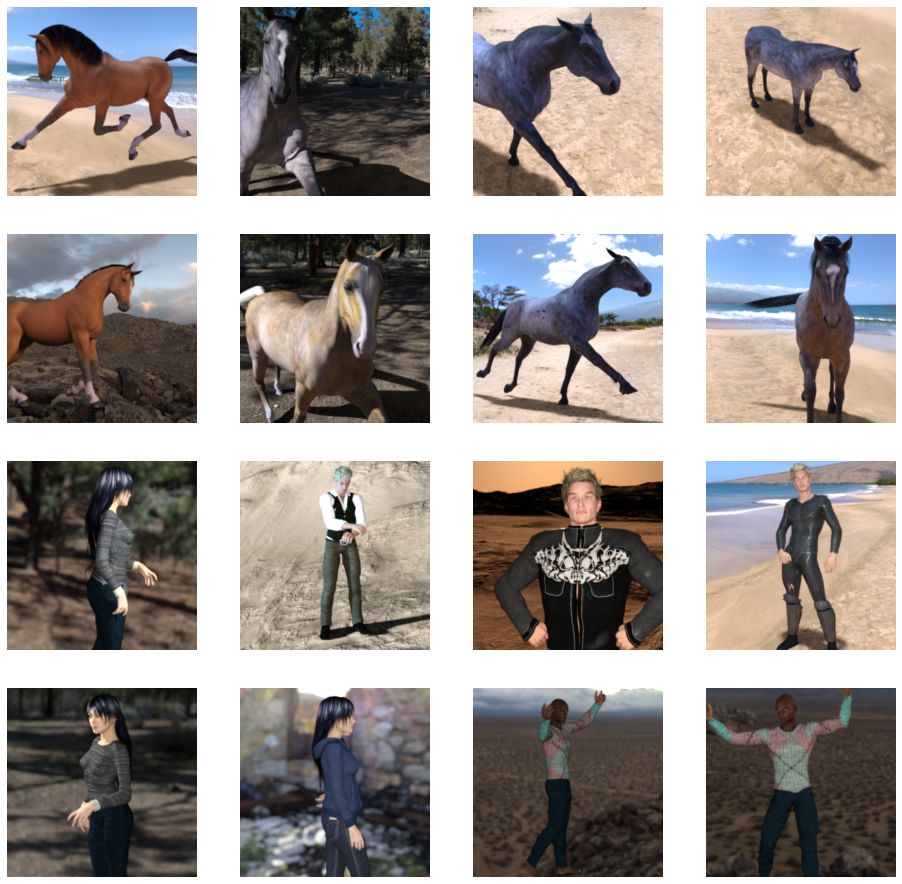

In [9]:
# Parameters for our graph
nrows = 4
ncols = 4

# Index for iterating over images 
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_px = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_px = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_px+next_human_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Convolutional Neural Network**
* Building Convolutional Neural Network from scratch using Tensorflow and Keras API.
* Since it is a two class Classification problem i.e a **Binary Classfication** problem, I will use sigmoid activation so that the output of my network will be a single scalar between 0 and 1, encodig the probability of the images.

In [16]:
# Building Convolutional Neural Network from scratch
model = tf.keras.models.Sequential([
                                    # The first convolution
                                    # Input image has 3 bytes color
                                    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed in Deep Neural Network
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

* Let's look at the summary of the Neural Network.

In [17]:
# Summary of Neural Network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

* Next, I will configure the specifications for model training. I will train the model with binary_crossentropy loss, because it is a binary classification problem and the activation is sigmoid.
* Here, I will be using RMSprop which is preferable for Stochastic Gradient Descent because RMSprop automates learning rate tuning for us.

In [18]:
# Compile the Model
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=["accuracy"])

**Data Processing**
* I will process our images by normalizing pixel values in range of  [0, 1] which is originally in range of [0, 255]

In [19]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/tmp/horse-or-human",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/tmp/validation-horse-or-human",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Callbacks**
* It stops the further execution of the program when the certain accuracy is achieved. I will build the callbacks which will stop the execution of the program after 99% accuracy is achieved by the model. 

In [14]:
# Building the Callbacks 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") > 0.99):
      print("\nReached 99% accurcy so stopping the execution of the program!")
      self.model.stop_training = True

# Instantiation
callbacks = myCallback()

### **Training the Model**
* I will train the Model for 15 epochs and 8 epoch per steps.
* The Loss and Accuracy are the great indication of the progress of training. It's making a guess to the classification of the training data and then measuring it against the known label calculating the result. Accuracy is the portion of the correct guesses.

In [20]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 6s 809ms/step - loss: 0.7240 - accuracy: 0.5106 - val_loss: 0.6631 - val_accuracy: 0.5039
Epoch 2/15
8/8 [==============================] - 6s 793ms/step - loss: 0.5857 - accuracy: 0.6696 - val_loss: 0.5949 - val_accuracy: 0.7188
Epoch 3/15
8/8 [==============================] - 6s 788ms/step - loss: 0.4407 - accuracy: 0.8465 - val_loss: 0.8704 - val_accuracy: 0.8203
Epoch 4/15
8/8 [==============================] - 6s 793ms/step - loss: 0.2882 - accuracy: 0.8888 - val_loss: 0.4711 - val_accuracy: 0.7969
Epoch 5/15
8/8 [==============================] - 6s 801ms/step - loss: 0.2101 - accuracy: 0.9277 - val_loss: 1.0482 - val_accuracy: 0.8672
Epoch 6/15
8/8 [==============================] - 6s 788ms/step - loss: 0.1584 - accuracy: 0.9355 - val_loss: 2.7552 - val_accuracy: 0.6406
Epoch 7/15
8/8 [==============================] - 7s 868ms/step - loss: 0.2048 - accuracy: 0.9255 - val_loss: 0.6673 - val_accuracy: 0.8281
Epoch 8/15
8/8 [====

**Model in Production**
* Now, Let's look at actually running a prediction using our model. The code below will allow you to choose 1 or more files from your file system. It will then upload and run the model and give indication wheather the object is horse or a human.

In [22]:
# Model in Production
# Using google colab file system
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0]) 
  if classes[0] > 0.5:
    print(fn, "is a human")
  else:
    print(fn, "is a horse")

Saving 20181003_065208_1.jpg to 20181003_065208_1.jpg
[1.]
20181003_065208_1.jpg is a human


* Finally, I have used the picture of myself and the model predicted human. 
* Hope you guys gain some insights!!